In [1]:
import time                             # sys time
import numpy as np                      # numpy library for matrix computations
from FootTrajectoryGenerator import *   # Foot trajectory generation Class
from DCMTrajectoryGenerator import *    # DCM trajectory generation Class(will be implemented by students)
from RobotUtils import *                # Class related to Inverse Kinematics 

In [2]:
#In this part we will specify the steps position and duration and we will implement foot trajectory generation
doubleSupportDuration = 0.25 #We select 0.25 second as DS duration
stepDuration = 1.2 #We select 1.2 second as step duration(step duration=SS+DS)
pelvisHeight= 0.7 #Constant pelvis(CoM) height during walking
maximumFootHeight = 0.07 #The maximum height of swing foot during each step

FootPlanner = FootTrajectoryGenerator(stepDuration, doubleSupportDuration, maximumFootHeight) #We create an object of foot FootTrajectoryGenerator Class
stepWidth=0.12 #=lateralDistanceOfFeet/2
stepLength=0.1 #longitudinal distance between two sequential feet stepLength=stepStride/2, 
numberOfFootPrints=17
FootPrints=np.empty((numberOfFootPrints, 3))

#In the following we define the foot step positions(Ankle joint position projected on foot print)
for i in range(0,numberOfFootPrints):
    if(i%2==0):
        if(i==0):
            FootPrints[i][:]=[i*stepLength,stepWidth,0.0]
        elif(i==numberOfFootPrints-1):
            FootPrints[i][:]=[(i-2)*stepLength,stepWidth,0.0]            
        else:
            FootPrints[i][:]=[(i-1)*stepLength,stepWidth,0.0]
    else:
        FootPrints[i][:]=[(i-1)*stepLength,-stepWidth,0.0]
            

FootPlanner.setFootPrints(FootPrints)#We set the foot step positions
FootPlanner.generateTrajectory() #We generate the foot trajectory 
leftFootTrajectory = np.array(FootPlanner.getLeftFootTrajectory())
rightFootTrajectory = np.array(FootPlanner.getRightFootTrajectory())

In [3]:
CoPOffset=np.array([0.00,0.0]) #Offset between CoP and footprint position(Ankle position) 

DCMPlanner = DCMTrajectoryGenerator(pelvisHeight, stepDuration, doubleSupportDuration)#We create an object of foot DCMTrajectoryGenerator Class

CoPPositions=np.empty((DCMPlanner.numberOfSteps+1, 3))#Initialization of the CoP array

for i in range(0,DCMPlanner.numberOfSteps+1):
    if(i%2!=0):
        CoPPositions[i][:]=[(i)*stepLength-CoPOffset[0],stepWidth-CoPOffset[1],0.0]
        if(i==1):
            CoPPositions[i][:]=[(i)*stepLength,stepWidth-CoPOffset[1],0.0]
    else:
        CoPPositions[i][:]=[(i)*stepLength-CoPOffset[0],-stepWidth+CoPOffset[1],0.0]
        if(i==0):
            CoPPositions[i][:]=[(i)*stepLength,-stepWidth+CoPOffset[1],0.0]

DCMPlanner.setCoP(CoPPositions)                 # Set the desired CoP positions (from the computation in prev block)
DCMPlanner.setFootPrints(FootPrints)            # Set the foot print positions  (from the computation in prev block)
DCMTrajectory = DCMPlanner.getDCMTrajectory()#At the end of DCM Planning the size of DCM vector should be 4320


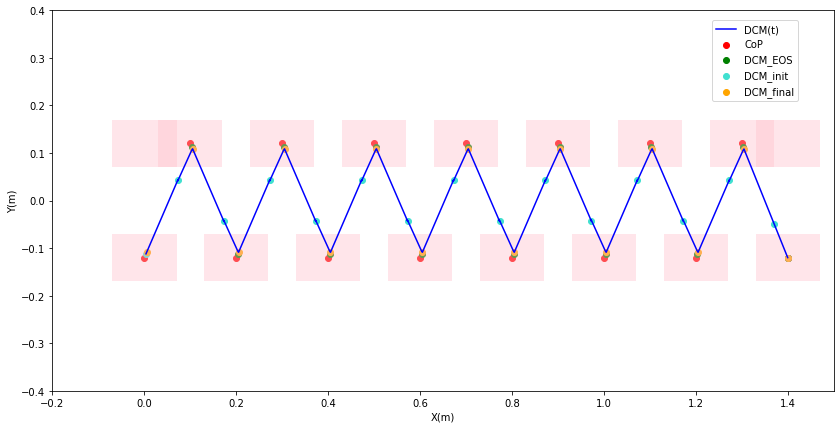

In [4]:
fig4, (ax4) = plt.subplots(figsize = (14, 7))
footWidth=0.1
footLength=0.14
for i in range(0,np.size(DCMPlanner.footPrints,0)):
    rect = plt.Rectangle((DCMPlanner.footPrints[i,0]-footLength/2, DCMPlanner.footPrints[i,1]-footWidth/2),footLength, footWidth,
           facecolor="pink", alpha=0.4) 
    ax4.add_patch(rect)
ax4.set(xlim=(-0.2, 1.5), ylim=(-0.4, 0.4))
ax4.scatter(DCMPlanner.CoP[:,0],DCMPlanner.CoP[:,1],c='red',label="CoP")

ax4.scatter(DCMPlanner.DCMForEndOfStep[:,0],DCMPlanner.DCMForEndOfStep[:,1],c='green',label="DCM_EOS")

ax4.scatter(DCMPlanner.initialDCMForDS[:,0],DCMPlanner.initialDCMForDS[:,1],c='turquoise',label="DCM_init")
ax4.scatter(DCMPlanner.finalDCMForDS[:,0],DCMPlanner.finalDCMForDS[:,1],c='orange',label="DCM_final")

ax4.set_xlabel('X(m)')
ax4.set_ylabel('Y(m)')
ax4.plot(DCMPlanner.DCM[:,0],DCMPlanner.DCM[:,1],'blue',label="DCM(t)")


fig4.legend(bbox_to_anchor=(0.87, 0.87))



In [5]:
DCMPlanner.doubleSupportInterpolationCoefficients

[[array([0.01571871, 0.03521456, 0.        ]),
  array([0.01388263, 0.0311012 , 0.        ]),
  array([0.01000756, 0.02241989, 0.        ]),
  array([ 0.00356436, -0.11201478,  0.        ])],
 [array([ -5.10498914, -12.31374083,   0.        ]),
  array([2.09491746, 4.9844265 , 0.        ]),
  array([-0.07605824, -0.21523271,  0.        ]),
  array([0.07291059, 0.04334129, 0.        ])],
 [array([-5.10498914, 12.31374083,  0.        ]),
  array([ 2.09491746, -4.9844265 ,  0.        ]),
  array([-0.07605824,  0.21523271,  0.        ]),
  array([ 0.17291059, -0.04334129,  0.        ])],
 [array([ -5.10498914, -12.31374083,   0.        ]),
  array([2.09491746, 4.9844265 , 0.        ]),
  array([-0.07605824, -0.21523271,  0.        ]),
  array([0.27291059, 0.04334129, 0.        ])],
 [array([-5.10498914, 12.31374083,  0.        ]),
  array([ 2.09491746, -4.9844265 ,  0.        ]),
  array([-0.07605824,  0.21523271,  0.        ]),
  array([ 0.37291059, -0.04334129,  0.        ])],
 [array([ 

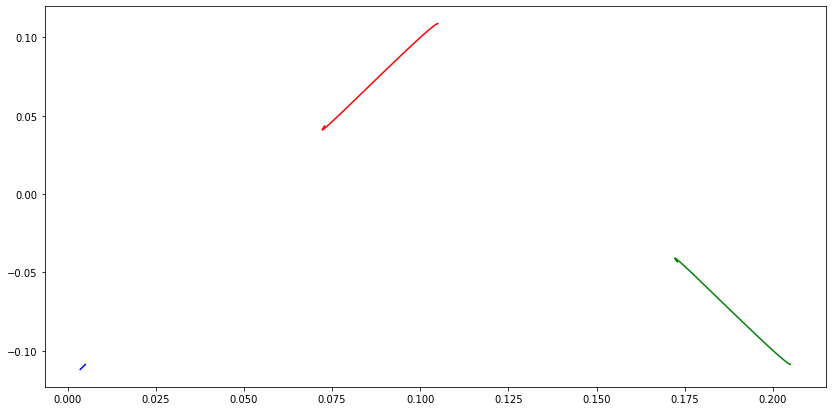

In [6]:
fig5, (ax5) = plt.subplots(figsize = (14, 7))


ax5.plot(DCMPlanner.listOfDoubleSupportTrajectories[0][:,0],DCMPlanner.listOfDoubleSupportTrajectories[0][:,1],'blue',label="DS(1)")
ax5.plot(DCMPlanner.listOfDoubleSupportTrajectories[1][:,0],DCMPlanner.listOfDoubleSupportTrajectories[1][:,1],'red',label="DS(2)")
ax5.plot(DCMPlanner.listOfDoubleSupportTrajectories[2][:,0],DCMPlanner.listOfDoubleSupportTrajectories[2][:,1],'green',label="DS(3)")

In [7]:

ax4.plot(DCMPlanner.CoM[:,0],DCMPlanner.CoM[:,1],'springgreen',label="CoM")
fig4.legend(bbox_to_anchor=(0.87, 0.87))
plt.show()


figg5, (ax5) = plt.subplots(figsize = (14, 7))
ax5.plot(DCMPlanner.DCM[:,0],'b',label="DCM")
ax5.plot(DCMPlanner.CoM[:,0],'g',label="CoM")
ax5.plot(DCMPlanner.CoPTrajectory[:,0],'--r',label="CoP")
ax5.set_xlabel('sampling time')
ax5.set_ylabel('X Trajectory(m)')
ax5.set(xlim=(-0.0,4300), ylim=(-0.0, 1.4))
figg5.legend(bbox_to_anchor=(0.8, 0.8))
plt.show() 

figg6, (ax6) = plt.subplots(figsize = (14, 7))
ax6.plot(DCMPlanner.DCM[:,1],'b',label="DCM")
ax6.plot(DCMPlanner.CoM[:,1],'g',label="CoM")
ax6.plot(DCMPlanner.CoPTrajectory[:,1],'--r',label="CoP")
ax6.set_ylabel('Y Trajectory(m)')
ax6.set_xlabel('sampling time')
ax6.set(xlim=(10,4300), ylim=(-0.14, 0.14))
figg6.legend(bbox_to_anchor=(0.8, 0.8))
plt.show() 

AttributeError: 'DCMTrajectoryGenerator' object has no attribute 'CoM'